# COGS 118A - Project Checkpoint

# Names

- Zirui Lin
- Ruoxin Li
- Yunhan Xiao
- Yongxi Liang
- Ruoqian Huang


# Abstract 
Disease prediction has always been a critical and never-ending problem for the medical field - we will always need to be more precise in diagnosing diseases. Automated learning algorithms may help doctors alleviate some of the hassles. The main goal of this study was to determine the probability of a new patient developing heart disease based on existing data on heart disease characteristics. After preprocessing the data, we plan to train the computer using different machine learning methods (e.g., decision tree/logistic regression models vs. support vector classifiers, etc.) Our aim is for the model to successfully determine a heart attack (disease or not) in a subject when faced with a new set of data. We will quantify the performance of the models using various error metrics (e.g., precision, recall) for the results obtained - more importantly, due to the inherent sensitivity of heart disease, we will choose the best model according to the reality of the situation (e.g., we need to ensure the lowest non-detection rate) or we can replace/add new models as the project progresses / add new models.


# Background

Heart disease mainly refers to various diseases that occur in the heart and the surrounding vascular system, such as coronary heart disease, hypertension, cardiomyopathy, etc. These diseases have had a serious impact on health and longevity worldwide, and their morbidity and mortality rates have been increasing over the past few decades. With an aging population, unhealthy lifestyles and changing dietary habits, the incidence of heart disease has shown an increasing trend. According to the World Health Organization (WHO)<a name="lorenznote"></a>[<sup>[1]</sup>](#lorenz), heart disease is one of the leading causes of death worldwide, killing approximately 18 million people each year. It is predicted that by 2035, heart disease will become one of the major global disease burdens, posing a serious threat to global public health.<br>

Heart disease remains an extremely complex disease whose etiology is influenced by a combination of many factors, such as genetics, environment, and lifestyle. In addition, new risk factors have been identified in recent years, such as air pollution and mental stress. All of these factors may contribute to the development and aggravation of heart disease, thus increasing mortality. With the continuous advancement of technological techniques and methods in today's society, researchers can now study the pathogenesis and treatment of heart disease in greater depth through automated learning algorithms<a name="admonish"></a>[<sup>[2]</sup>](#admonishnote). Automatic learning algorithms are a new technology that can automatically learn and analyze from large amounts of data and use it for prediction and judgment. In predicting heart disease, they can learn and build prediction models from clinical information of heart disease patients, which can be very helpful for doctors to more accurately understand the risk level of patients and develop effective treatment plans<a name="sota"></a>[<sup>[3]</sup>](#sotanote). Moreover, by training a large number of clinical data from heart disease patients, features and patterns are extracted and prediction models are built. This allows us to predict the risk of heart disease in patients and to develop individualized treatment plans for patients based on the prediction results.<br>

In conclusion, heart disease has seriously affected global health problems and requires the concerted efforts of medical researchers worldwide. Therefore, in-depth research of the causative factors and treatments of heart disease, and the search for powerful treatments and effective preventive measures can make an important contribution to reducing the incidence and mortality of heart disease.





# Problem Statement

We aim to utilize machine learning algorithms for analyzing the current datasets, and train a predictive model that is most suitable to improve the accuracy of heart disease diagnosis based on the patient's various health indicators. Heart disease prediction model can help identify high-rish individuals which can lead to early intervention and treatment, ultimately preventing or delaying the onset of disease.

# Data

**Heart disease Dataset**  <br>
https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease<br>
319795 observations with 18 variables<br>
Critical variables:

- HeartDisease
- BMI
- Smoking
- Alcohol Drinking
- Stroke
- PhysicalHealth
- MentalHealth
- DiffWalking (climbing stairs)
- Sex
- AgeCategory
- Race
- Diabetic
- PhysicalActivity
- GenHealth
- SleepTime
- Asthma
- KidneyDisease
- SkinCancer

This dataset was from 2020 annual CDC survey data of adults related to their health status.

In [ ]:
#import packages
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import statistics


In [ ]:
dataset=pd.read_csv('heart_2020_cleaned.csv')
dataset.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
print(dataset.shape)

(319795, 18)


## EDA

heart disease ratio visualization (imbalanced)



In [ ]:
heart_disease_yes = dataset['HeartDisease'].str.count('Yes').sum()
heart_disease_no = dataset['HeartDisease'].str.count('No').sum()


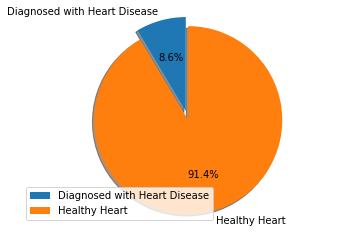

In [ ]:
labels = 'Diagnosed with Heart Disease', 'Healthy Heart'
sizes = [heart_disease_yes,heart_disease_no]
explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Healthy Heart')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()
plt.show()

<AxesSubplot:>

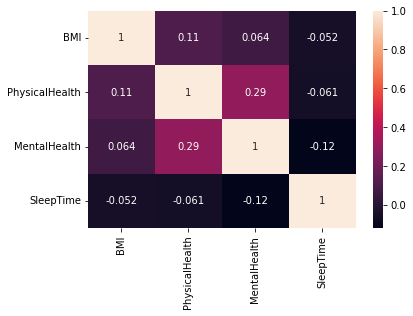

In [ ]:
import seaborn as sns

# The heatmap of the correlation matrix that helps us identify correlations between variables
sns.heatmap(dataset.corr(), annot=True)

<AxesSubplot:xlabel='BMI', ylabel='Count'>

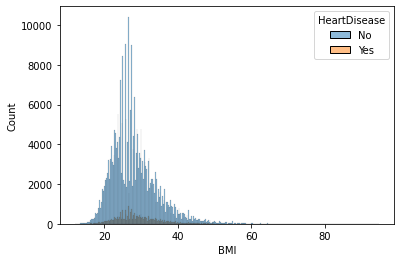

In [ ]:
# For example, we can see the relationship between BMI and HeartDisease. From the diagram, we can infer that people with BMI within a certain range are more likely to get heart disease.
sns.histplot(x = 'BMI', hue = 'HeartDisease', data = dataset)

We can also draw diagrams to see the effect of other health indicators. In the end, since we know these health indicators play a part in the possiblity of getting a heart disease, we can begin our data preprocessing and training of our models.

## Data Processing

In [ ]:
# Delete the column with missing values
dataset = dataset.dropna(axis=1)

# Find the duplicates
duplicates = dataset[dataset.duplicated()]

# Delete the duplicates
data = dataset.drop_duplicates()

In [ ]:
# Demonstrate suitability: our dataset has fulfilled the size requirement
print(data.shape)

(301717, 18)


In [ ]:
data.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

Since the age is represented by the interval (for example, for the category between 55-59), we could encode this by using the start age of the corresponding groups.

In [ ]:
data['AgeCategory'].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [ ]:
def convertAge(a):
    numStr = ''
    numStr = a[0] + a[1]
    return np.float64(numStr)
data['AgeCategory'] = data['AgeCategory'].apply(lambda x: convertAge(x))

In [ ]:
data['AgeCategory'].unique()

array([55., 80., 65., 75., 40., 70., 60., 50., 45., 18., 35., 30., 25.])

In [ ]:
## Encode the non-numerical variables
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
le = preprocessing.LabelEncoder()
feature_names = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']
for feature in feature_names:
  data[feature] = le.fit_transform(data[feature])
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55.0,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80.0,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65.0,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75.0,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40.0,5,0,1,4,8.0,0,0,0


In [ ]:
# Split the data into train set and test set
from sklearn.model_selection import train_test_split
X = data.loc[:, data.columns != 'HeartDisease']
y = data['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Evaluation Metrics

We are going to use several classification metrics such as precision and recall to assess the validity of our model. Precision = TP / (TP + FP). A higher precision value means we can correctly identify a larger proportion of positive predictions among all positive predictions. Recall = TP / (TP + FN). A higher recall value means we can correctly identify a larger proportion of positive cases in the dataset. Thus, we are better at identifying patients who actually have heart disease, and we are less likely to miss patients who require further diagnosis and treatments. We can also calculate the Fl score from precision and recall to find a good balance between these metrics.

# Proposed Solution

We aim to achieve the discrimination of cardiac patients using supervised machine learning models, relying on the features given in the data. For this purpose, we will segment some of the feature data from a random healthy or diseased population and use it as a test set to evaluate the model results. For data preprocessing, we would encode the categorical variables with numberical values. We would unify all the data into the same format for later use during data preprocessing. 

We will use these features for algorithm selection to try to build logistic regression, SVM and random forest models. Below is a specific explanation for each of these models in this project.<br><br>


Logistic regression<br>
The main feature of logistic regression is its ability to fit a decision boundary linearly. Since two outcomes exist in our dataset: Patients who are sick (1) or healthy (0). In addition to the training and test sets, we will split a certain amount of data into the data and create a validation set. For the selection of the best hyperparameters, we expect to use a gradient descent approach to find the method that minimizes the loss function and use the validation set to evaluate the parameters based on the obtained F1 data. Finally, we will use the test set for prediction and evaluate the model results using accuracy, recall, and F1 data.<br><br>


SVM<br>
The SVM is characterized by its ability to find a hyperplane to separate the classes while creating maximum margins between classes, i.e., making the distinction between each class the most obvious. This is determined by the support vector in the category and can be achieved by minimizing the loss function. We will use linear SVM because our dataset is large, and linear SVM is well adapted to large datasets. Since our classification is binary, we believe there will be no curvature in the linear SVM. After building the test and training sets, we will use the one-to-one classifier to classify the model and later evaluate the model (this will be explained later).<br><br>

RandomForest<br>

Random forests are characterized by their ability to ensemble multiple decision tree models, each using a random subset of the training data. We mainly use random forests because decision tree models are well suited for classification problems, and random number models have more advantages over decision trees. The two most important ones are:
 1. Random forests can evaluate the impact of different features on the results because the features used in each decision tree in the forest are arbitrary. For some of them, some features are removed from the model training features. The random forest results will reflect the impact of eliminating these features on the results. This will help us determine each feature's effect on disease causation, which is important in reality for disease prevention. 
 2. The regression forest also prevents overfitting by averaging the results of multiple decision tree models, which is essential for the large number of features we use.

<br>


For model performance evaluation, we will use accuracy, precision, F1 score, and recall rate to evaluate the performance of the models and use cross-validation to prevent overfitting. For the baseline approach, we will use the logistic regression model as the baseline model because this model is very interpretable and the impact of different features on the final result can be seen from the weights of the features; and it itself does not require scaling of the features and takes up less computational resources. In addition, we will visualize the prediction results of the model, which includes drawing icons with confusion matrices.

# Preliminary results

NEW SECTION!

Please show any preliminary results you have managed to obtain.

Examples would include:
- Analyzing the suitability of a dataset or alogrithm for prediction/solving your problem 
- Performing feature selection or hand-designing features from the raw data. Describe the features available/created and/or show the code for selection/creation
- Showing the performance of a base model/hyper-parameter setting.  Solve the task with one "default" algorithm and characterize the performance level of that base model.
- Learning curves or validation curves for a particular model
- Tables/graphs showing the performance of different models/hyper-parameters



In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, mean_squared_error

from sklearn.metrics import zero_one_loss, accuracy_score, roc_auc_score, f1_score
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [ ]:
# Base model: Logistic regression
classifier_model = make_pipeline(
    StandardScaler(), 
    LogisticRegression(random_state=0, penalty='l2')
)

In [ ]:
classifier_model.fit(X_train, y_train)

y_pred_train = classifier_model.predict(X_train)
y_pred_test = classifier_model.predict(X_test)

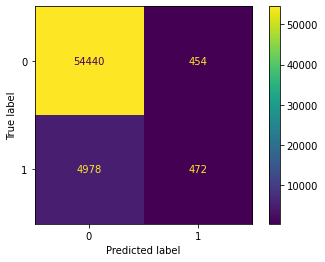

In [ ]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(cm);
disp.plot()

In [ ]:
(true_negatives, false_positives,
 false_negatives, true_positives
) = confusion_matrix(y_train, y_pred_train).ravel()

In [ ]:
scores = classifier_model.predict_proba(X_test)[:,1]
fps = []
tps = []
for threshold in np.linspace(0,1,1000):
    y_pred = scores > threshold
    # Step 1: Compute the confusion matrix
    # Step 2: Compute the TP and FP 
    # and append it to fps and tps
    cm = confusion_matrix(y_test, y_pred)
    (true_negatives, false_positives, false_negatives, true_positives) = cm.ravel()
    fpr = false_positives / (false_positives + true_negatives)
    tpr = true_positives / (true_positives + false_negatives)
    fps.append(fpr)
    tps.append(tpr)

In [ ]:
def my_auc(fps, tps):
    arrFPS = np.array(fps)
    arrTPS = np.array(tps)
    auc = -1 * np.trapz(arrTPS, arrFPS)
    return auc

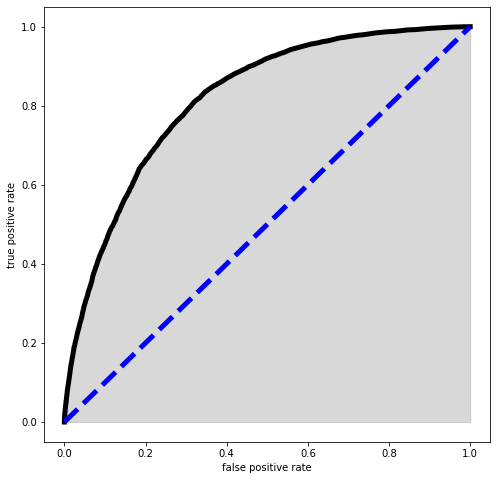

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.plot(fps, tps, linewidth=5, color='k')
ax.plot(np.linspace(0,1, 20), np.linspace(0,1, 20), linewidth=5, color='b', linestyle='--')
assert fps != [] and tps != []
ax.fill_between(fps, tps, [0]*len(tps), color='grey', alpha=0.3)
ax.set_xlabel("false positive rate")
ax.set_ylabel("true positive rate");

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn. metrics import classification_report
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     54894
           1       0.51      0.09      0.15      5450

    accuracy                           0.91     60344
   macro avg       0.71      0.54      0.55     60344
weighted avg       0.88      0.91      0.88     60344



In [ ]:
# Performe cross-validation to the logistic regression model
score = {'Accuracy': make_scorer(accuracy_score), 'Precision': make_scorer(precision_score), 'Recall': make_scorer(recall_score), 'F1_score': make_scorer(f1_score)}
logistic_c = cross_validate(classifier_model, X, y, cv=10, scoring=score)
logistic_c

{'fit_time': array([0.31944776, 0.32272577, 0.54356742, 0.53087902, 0.48921061,
        0.73289013, 0.48594832, 0.69504619, 0.67355323, 0.48411989]),
 'score_time': array([0.0378449 , 0.0390656 , 0.04912949, 0.07081485, 0.06950569,
        0.0759511 , 0.08021545, 0.05096269, 0.10456276, 0.08139515]),
 'test_Accuracy': array([0.91180565, 0.90991648, 0.90971762, 0.91041363, 0.91084449,
        0.90958505, 0.91193822, 0.90719565, 0.91087468, 0.91057638]),
 'test_Precision': array([0.56756757, 0.5075188 , 0.50236967, 0.52516411, 0.54245283,
        0.49775785, 0.58333333, 0.42965779, 0.53961456, 0.52811245]),
 'test_Recall': array([0.10014674, 0.09904622, 0.07776963, 0.08804109, 0.08437271,
        0.081438  , 0.08984232, 0.08290536, 0.09244314, 0.09647836]),
 'test_F1_score': array([0.17025257, 0.16574586, 0.13468869, 0.15080113, 0.14603175,
        0.13997478, 0.15570384, 0.13899139, 0.15784529, 0.16315136])}

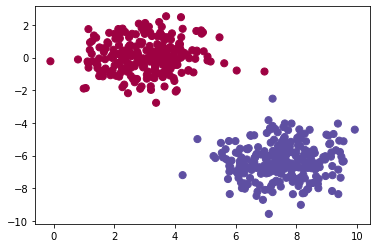

In [ ]:
# SVM model
from sklearn.datasets import make_blobs

X_train_SVM, y_train_SVM = make_blobs(n_samples=500, centers=2,
                  random_state=18, cluster_std=1)
plt.scatter(X_train_SVM[:, 0], X_train_SVM[:, 1], c=y_train_SVM, s=50, cmap='Spectral');

In [ ]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

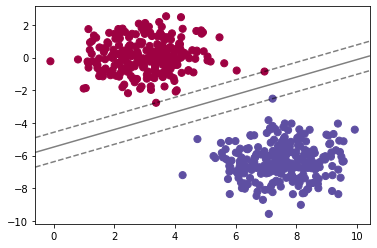

In [ ]:
from sklearn.svm import SVC
# Define and Fit your Model
model = SVC(kernel='linear', C=1000)
model.fit(X_train_SVM, y_train_SVM)

# Plot the Data and the Decision Boundary
plt.scatter(X_train_SVM[:, 0], X_train_SVM[:, 1], c=y_train_SVM, s=50, cmap='Spectral');
plot_svc_decision_function(model);

In [ ]:
# SHould be edited later
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
test_acc = []
test_f1 = []
test_recall = []
test_precision = []

for axi, C in zip(ax, [10.0, 0.1]):
    # Define your model
    model = SVC(kernel='linear', C=C)
    model.fit(X_train, y_train)
    
    # Calculate and append Accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    test_acc.append(accuracy)
    test_f1.append(f1)
    test_recall.append(recall)
    test_precision.append(precision)
    
    # Plotting
    plot_svc_decision_function(model, ax=axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none')
    axi.set_title('C = {0:.1f}'.format(C), size=14)
print(test_acc)
print(test_f1)
print(test_recall)
print(test_precision)

# Ethics & Privacy

There is no significant privacy issue here because the names and social security numbers of the patients were removed from the database. Ethical concern: this dataset is conducted by the CDC using telephone surveys, and their targets are the U.S. residents. Therefore, these databases cannot represent potential patients all over the world. Therefore, it is possible to be subject to a collection bias. We will address this issue by clearly stating the sources and informing the audience that this research can only be a reference instead of an authority.


# Team Expectations 

* We will write the accompanying text throughout the project to explain each section.
* We will make decisions based on every group members’ will.
* We will schedule weekly meetings via Zoom throughout this quarter to discuss our project.
* We will respect each other’s opinions and make contributions to our project together.
* We will set deadlines to accomplish each goal for our project.

# Project Timeline Proposal



| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 2/1  |  3 PM |  Read & Think about COGS 118A expectations; brainstorm topics/questions  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 2/8  |  1 PM |  Do background research on topic  | Discuss ideal dataset(s) and ethics; draft project proposal | 
| 2/22  | Before 11:59 PM  | Edit, finalize, and submit proposal; Search for datasets  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 2/26  | 1 PM  | Import & Wrangle Data  | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 3/10  | 12 PM  | Finalize wrangling/EDA; Begin analysis using Machine Learing Algorithm | Discuss/edit project code; Complete project |
| 3/17  | 12 PM  | Complete analysis; Draft results/conclusion/discussion| Discuss/edit full project |
| 3/22  | Before 11:59 PM  | NA | Turn in Final Project  |

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): “Cardiovascular Diseases.” World Health Organization, World Health Organization, https://www.who.int/health-topics/cardiovascular-diseases. <br> 
<a name="admonishnote"></a>2.[^](#admonish): Heart Disease Prediction Using Machine Learning Algorithms - Iopscience. https://iopscience.iop.org/article/10.1088/1757-899X/1022/1/012072/meta. <br>
<a name="sotanote"></a>3.[^](#sota): Pal, Madhumita, et al. “Risk Prediction of Cardiovascular Disease Using Machine Learning Classifiers.” Open Medicine (Warsaw, Poland), U.S. National Library of Medicine, 17 June 2022, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9206502/. 
